## 회귀

* 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
* 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법
  * 종속변수: 아파트 가격
  * 독립변수: 방 개수, 아파트 크기, 주변 학군, 근처 지하철 개수
  * 회귀계수: 독립변수의 값에 영향을 미치는 계수
* 머신러닝 회귀 예측의 핵심은 주어진 Feature와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것
* 최적의 회귀 모델은 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델(오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾음)
* 회귀 유형
  * 선형 회귀
    * 대부분의 경우 비선형 회귀보다 예측성이 좋음
  * 비선형 회귀
  * 단일 회귀 (Feature가 1개)
  * 다중 회귀
* Classification과의 차이점
  * Classification의 결과: Category(이산) 값
  * Regression의 결과: 숫자(연속)값

## 회귀 비용함수

* RSS
  * 오류 값의 제곱을 구해서 더하는 방식으로 미분 등의 계산을 편리하게 하기 위해 RSS 방식으로 오류 합을 구함 (오류 값이 음수도 나올 수 있기 때문)
  * 회귀식의 독립변수 X, 종속변수 Y가 중심이 아닌 w 변수 (회귀 계수)가 중심 변수임
  * RSS는 비용(cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 **비용 함수(loss function)**라고 함. 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(오류 값)을 지속해서 감소시키고 최종적으로 더 이상 감소하지 않는 최소의 오류 값을 구하는 것
  * R(w)를 미분해 미분 함수의 최솟값을 구해야 한다. 하지만 R(w)는 w0, w1 두 개의 파라미터를 가지고 있다. 때문에 일반적인 미분을 적용할 수 없고 w0, w1 각 변수에 편미분을 적용해야 한다.
    * 편미분: 특정 변수를 제외한 나머지는 모두 상수로 취급하여 미분하는 것)
    * 편미분 된 w0, w1의 식을 반복적으로 업데이트 하면서 비용 함수가 최소가 되는 값을 찾음
    * 실제 편미분 값이 너무 클 수 있으므로 보정계수 n (학습률)을 곱함
    <br />
    
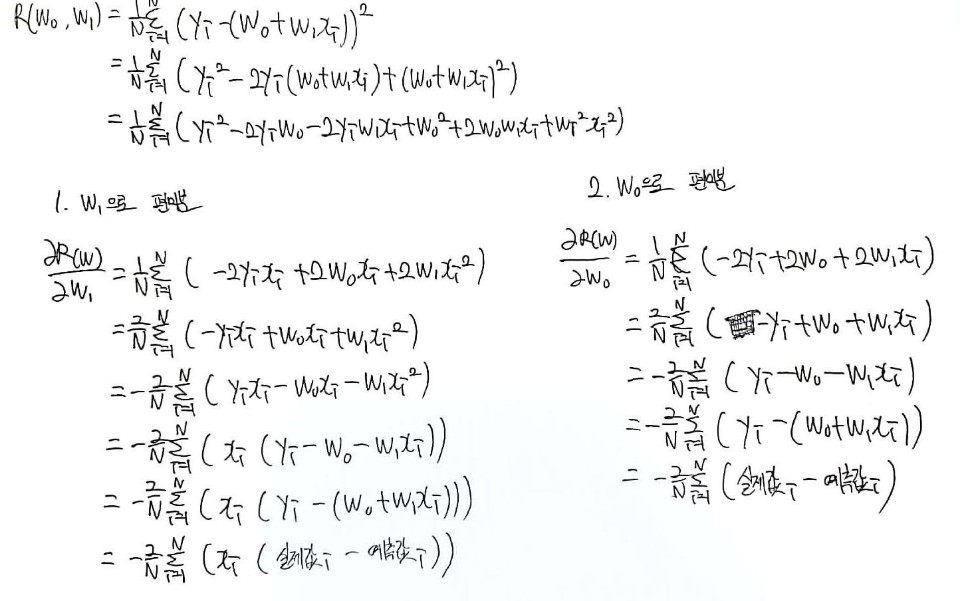
* 경사 하강법 (Gradient Descent)
  * **점진적으로** 반복적인 계산을 통해 w 파라미터 값을 업데이트하면서 **오류 값이 최소가 되는 w 파라미터를 구하는 방식**	
    * 어떻게 하면 오류가 작아지는 방향으로 w 값을 보정할 수 있을까?
  * 미분을 통해 비용 함수의 최소값을 찾음
    * 미분은 증가 또는 감소의 방향성을 나타냄
    * 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 w를 업데이트
    * 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주

## Gradient Desent

**실제 값을 Y=4X+6 시뮬레이션하는 데이터 값 생성**

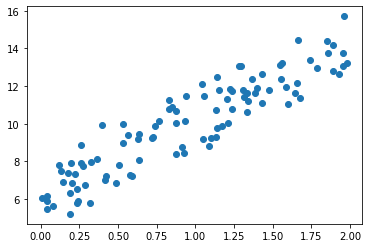

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 시을 근사 (w1=4, w0=6). random 값은 Noise를 위해 생성
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

plt.scatter(X, y)

In [2]:
X.shape, y.shape

((100, 1), (100, 1))

**w0과 w1의 값을 최소화 할 수 있도록 업데이트를 수행하는 함수 생성**
* 예측 배열 y_pred는 np.dot(X, w1.T) + w0임, 100개의 데이터 X(1, 2,..., 100)이 있다면 예측값은 w0 + X(1)w1 + ... + X(100)w1이며 이는 입력 배열 X와 w1 배열의 내적임
* 새로운 w1과 w0을 update함

In [3]:
# w1과 w0을 업데이트 할 w1_update, w0_update 반환
def get_weight_updates(w1, w0, X, y, learning_rate = 0.01):
    N = len(y)
    
    # w1_update, w0_update를 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트 할 w1_update, w0_update 계산
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [4]:
w0 = np.zeros((1, 1))
w1 = np.zeros((1, 1))
y_pred = np.dot(X, w1.T) + w0
diff = y - y_pred
print(diff.shape)

w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

**반복적으로 경사 하강법을 이용하여 get_weight_updates()를 호출하여 w1과 w0을 업데이트**

In [5]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0을 업데이트
def gradient_descent_steps(X, y, iters = 10000):
    # w1과 w0을 모두 0으로 초기화
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates()를 호출하여 w1, w0 업데이트
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

**예측 오차 비용 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [6]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred) / N)
    return cost

w1, w0 = gradient_descent_steps(X, y, iters = 1000)
print("w1: {0:.3f}, w0: {1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.022, w0: 6.162
Gradient Descent Total Cost:0.9935


**미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출**

In [7]:
def stochastic_gradient_descent_steps(X, y, batch_size = 10, iters = 1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [8]:
# 랜덤으로 index 추출
np.random.permutation(X.shape[0])

array([66, 71, 54, 88, 82, 12, 36, 46, 14, 67, 10,  3, 62, 29, 97, 69, 70,
       93, 31, 73, 60, 96, 28, 27, 21, 19, 33, 78, 32, 94,  1, 41, 40, 76,
       37, 87, 24, 23, 50,  2, 47, 20, 77, 17, 56, 64, 68, 25, 15, 22, 16,
       98, 63, 92, 86, 38,  6, 57, 95, 44,  9, 42, 81, 99, 35, 84, 59, 48,
       75, 65, 85, 90, 55, 43, 58, 89, 30, 80, 34, 18, 51, 49, 52, 74, 26,
       45, 39,  4, 11, 53, 91, 79,  8,  0,  5, 13, 61, 72,  7, 83])

In [9]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937
